### Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

### Loading the Dataset

In [3]:
train_data = pd.read_csv("D:/Machine Learning/Loan-Approval-Prediction/Datasets/train_u6lujuX_CVtuZ9i.csv")
test_data = pd.read_csv("D:/Machine Learning/Loan-Approval-Prediction/Datasets/test_Y3wMUE5_7gLdaTN.csv")

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
print(train_data.columns)
print(test_data.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train_data.shape

(614, 13)

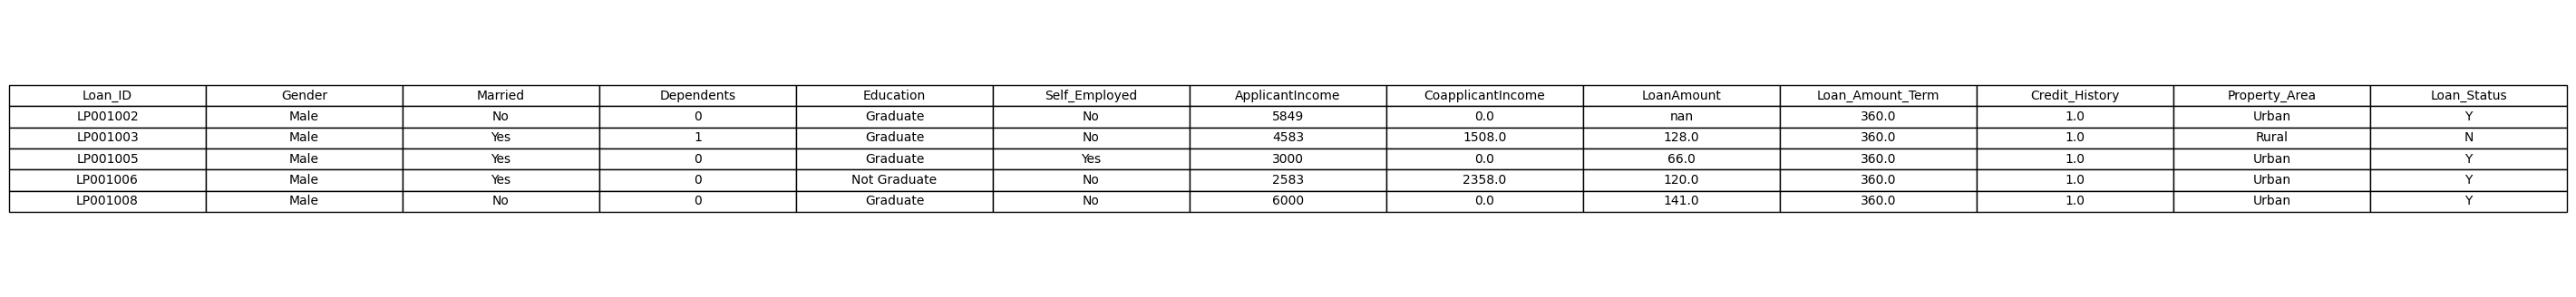

In [9]:
# Select first 5 rows of data
df = train_data.head()

# Create figure with dynamic width based on number of columns
fig, ax = plt.subplots(figsize=(df.shape[1] * 2, 4))  
ax.axis('off')  # Hide axis

# Create the table
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

# Styling
table.auto_set_font_size(False)
table.set_fontsize(10)  
table.scale(1.4, 1.4)

# Save as a larger image
plt.savefig("train_data_large_table.png", bbox_inches='tight', dpi=300)

# Show the table
plt.show()

In [10]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


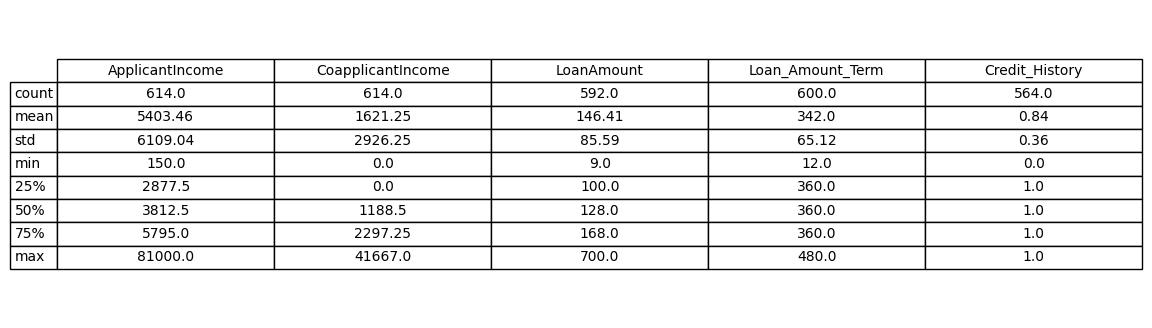

In [11]:
# Get summary stats of numerical columns
summary_df = train_data.describe()
# Set up larger figure size based on number of columns
fig, ax = plt.subplots(figsize=(summary_df.shape[1] * 2, 4))
ax.axis('off')  # Hide axes

# Create the table
table = ax.table(
    cellText=summary_df.values.round(2),     # round numbers for neatness
    rowLabels=summary_df.index,
    colLabels=summary_df.columns,
    cellLoc='center',
    loc='center'
)

# Style settings
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.4, 1.4)

# Save table as image
plt.savefig("train_data_description.png", bbox_inches='tight', dpi=300)
plt.show()

### Preprocessing Missing Data

In [12]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Filling the missing data in the columns

In [13]:
train_data['Gender'] = train_data['Gender'].fillna(train_data['Gender'].mode()[0])

In [14]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)

C:\Users\Muradul Islam\AppData\Local\Temp\ipykernel_14864\2529413235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)


In [16]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
train_data['Dependents'].replace('3+', 3, inplace=True)

C:\Users\Muradul Islam\AppData\Local\Temp\ipykernel_14864\1952149916.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Dependents'].replace('3+', 3, inplace=True)


In [18]:
train_data['Dependents'] = train_data['Dependents'].astype('float')  # use float in case of NaN

In [19]:
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Dependents'] = train_data['Dependents'].astype('int')

C:\Users\Muradul Islam\AppData\Local\Temp\ipykernel_14864\2753875474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)


In [20]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)

C:\Users\Muradul Islam\AppData\Local\Temp\ipykernel_14864\180632665.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)


In [22]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

C:\Users\Muradul Islam\AppData\Local\Temp\ipykernel_14864\2321568055.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)


In [24]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)

C:\Users\Muradul Islam\AppData\Local\Temp\ipykernel_14864\482646581.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)


In [26]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
train_data.isnull().sum()

C:\Users\Muradul Islam\AppData\Local\Temp\ipykernel_14864\2962190257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
print("\nColumn names: ")
for column in train_data.columns:
    print(column)


Column names: 
Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


### Counts

In [28]:
train_data['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [32]:
train_data['Married'].value_counts(dropna=False)

Married
Yes    401
No     213
Name: count, dtype: int64

In [33]:
train_data['Dependents'].value_counts(dropna=False)

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [34]:
train_data['Education'].value_counts(dropna=False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [35]:
train_data['Self_Employed'].value_counts(dropna=False)

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [36]:
train_data['Credit_History'].value_counts(dropna=False)

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

In [37]:
train_data['Property_Area'].value_counts(dropna=False)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [38]:
train_data['Loan_Status'].value_counts(dropna=False)

Loan_Status
Y    422
N    192
Name: count, dtype: int64